# Exercise 2

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets

np.random.seed(1234)

In [31]:
x_values = np.random.normal(size = 100)
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [3*i + 5 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

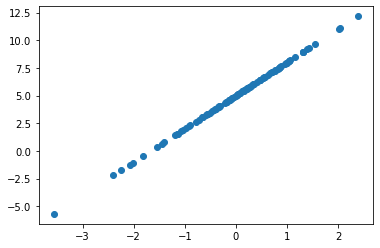

In [32]:
plt.scatter(x_train, y_train)

In [33]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [44]:
inputDim = 1        
outputDim = 1       
learningRate = 0.01 
epochs = 500

model = linearRegression(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()

In [45]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [46]:
for epoch in range(epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)
    
    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(44.1728, grad_fn=<MseLossBackward>)
epoch 0, loss 44.172813415527344
tensor(42.3788, grad_fn=<MseLossBackward>)
epoch 1, loss 42.3787841796875
tensor(40.6576, grad_fn=<MseLossBackward>)
epoch 2, loss 40.65764236450195
tensor(39.0064, grad_fn=<MseLossBackward>)
epoch 3, loss 39.006431579589844
tensor(37.4223, grad_fn=<MseLossBackward>)
epoch 4, loss 37.422306060791016
tensor(35.9025, grad_fn=<MseLossBackward>)
epoch 5, loss 35.902530670166016
tensor(34.4445, grad_fn=<MseLossBackward>)
epoch 6, loss 34.44449996948242
tensor(33.0457, grad_fn=<MseLossBackward>)
epoch 7, loss 33.04570007324219
tensor(31.7037, grad_fn=<MseLossBackward>)
epoch 8, loss 31.7037296295166
tensor(30.4163, grad_fn=<MseLossBackward>)
epoch 9, loss 30.416275024414062
tensor(29.1811, grad_fn=<MseLossBackward>)
epoch 10, loss 29.181116104125977
tensor(27.9961, grad_fn=<MseLossBackward>)
epoch 11, loss 27.996143341064453
tensor(26.8593, grad_fn=<MseLossBackward>)
epoch 12, loss 26.859296798706055
tensor(25.7686, 

tensor(0.0267, grad_fn=<MseLossBackward>)
epoch 179, loss 0.0267269778996706
tensor(0.0256, grad_fn=<MseLossBackward>)
epoch 180, loss 0.025645071640610695
tensor(0.0246, grad_fn=<MseLossBackward>)
epoch 181, loss 0.024606898427009583
tensor(0.0236, grad_fn=<MseLossBackward>)
epoch 182, loss 0.023610742762684822
tensor(0.0227, grad_fn=<MseLossBackward>)
epoch 183, loss 0.02265501208603382
tensor(0.0217, grad_fn=<MseLossBackward>)
epoch 184, loss 0.021738000214099884
tensor(0.0209, grad_fn=<MseLossBackward>)
epoch 185, loss 0.020858094096183777
tensor(0.0200, grad_fn=<MseLossBackward>)
epoch 186, loss 0.020013807341456413
tensor(0.0192, grad_fn=<MseLossBackward>)
epoch 187, loss 0.01920376718044281
tensor(0.0184, grad_fn=<MseLossBackward>)
epoch 188, loss 0.01842648722231388
tensor(0.0177, grad_fn=<MseLossBackward>)
epoch 189, loss 0.017680702731013298
tensor(0.0170, grad_fn=<MseLossBackward>)
epoch 190, loss 0.016965145245194435
tensor(0.0163, grad_fn=<MseLossBackward>)
epoch 191, loss

epoch 341, loss 3.35331387759652e-05
tensor(3.2179e-05, grad_fn=<MseLossBackward>)
epoch 342, loss 3.217923585907556e-05
tensor(3.0882e-05, grad_fn=<MseLossBackward>)
epoch 343, loss 3.088153607677668e-05
tensor(2.9637e-05, grad_fn=<MseLossBackward>)
epoch 344, loss 2.9637325496878475e-05
tensor(2.8441e-05, grad_fn=<MseLossBackward>)
epoch 345, loss 2.8440595997381024e-05
tensor(2.7294e-05, grad_fn=<MseLossBackward>)
epoch 346, loss 2.729448715399485e-05
tensor(2.6194e-05, grad_fn=<MseLossBackward>)
epoch 347, loss 2.6193685698672198e-05
tensor(2.5140e-05, grad_fn=<MseLossBackward>)
epoch 348, loss 2.5140207071672194e-05
tensor(2.4129e-05, grad_fn=<MseLossBackward>)
epoch 349, loss 2.4128945369739085e-05
tensor(2.3157e-05, grad_fn=<MseLossBackward>)
epoch 350, loss 2.3157459509093314e-05
tensor(2.2225e-05, grad_fn=<MseLossBackward>)
epoch 351, loss 2.2225221982807852e-05
tensor(2.1329e-05, grad_fn=<MseLossBackward>)
epoch 352, loss 2.1329229639377445e-05
tensor(2.0472e-05, grad_fn=<Mse

In [47]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 6.4140706 ]
 [ 1.4268999 ]
 [ 9.29785   ]
 [ 4.0618386 ]
 [ 2.8380432 ]
 [ 7.6612387 ]
 [ 7.578516  ]
 [ 3.0902357 ]
 [ 5.046871  ]
 [-1.7281885 ]
 [ 8.449847  ]
 [ 7.975584  ]
 [ 7.8597193 ]
 [-1.0639067 ]
 [ 3.997563  ]
 [ 5.0061374 ]
 [ 6.216128  ]
 [ 5.867048  ]
 [ 8.963208  ]
 [ 0.3591237 ]
 [ 4.391851  ]
 [ 3.031899  ]
 [ 5.5800395 ]
 [ 6.6600785 ]
 [ 8.954188  ]
 [ 3.5918841 ]
 [ 7.0264196 ]
 [-0.45123148]
 [ 4.450464  ]
 [ 8.176651  ]
 [ 3.8062768 ]
 [ 6.012083  ]
 [ 8.142479  ]
 [ 8.137558  ]
 [ 7.5909023 ]
 [ 4.6335125 ]
 [ 5.3739166 ]
 [ 4.03141   ]
 [ 7.5247755 ]
 [12.172575  ]
 [ 5.2283783 ]
 [ 3.3004658 ]
 [ 5.108207  ]
 [-1.2250733 ]
 [ 5.7431498 ]
 [ 2.3083456 ]
 [ 4.589403  ]
 [ 5.0546494 ]
 [ 7.2659965 ]
 [ 5.6455803 ]
 [ 7.5227776 ]
 [ 0.66240597]
 [ 0.7939148 ]
 [ 4.6970315 ]
 [ 3.3550756 ]
 [ 4.5659294 ]
 [ 6.0618305 ]
 [ 4.8932447 ]
 [ 6.6969767 ]
 [ 9.636702  ]
 [ 2.0771098 ]
 [ 4.7887506 ]
 [ 5.9236774 ]
 [ 4.3742943 ]
 [ 8.101147  ]
 [-2.201489  ]
 [11.09151

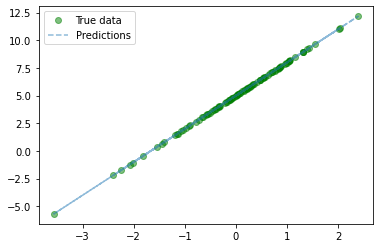

In [48]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()